In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 69, 69, 64)        0

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 3s 40ms/step - loss: 0.1375 - accuracy: 0.9542 - val_loss: 0.3712 - val_accuracy: 0.8776
Epoch 2/20
83/83 [==============================] - 3s 39ms/step - loss: 0.1557 - accuracy: 0.9448 - val_loss: 0.3926 - val_accuracy: 0.8401
Epoch 3/20
83/83 [==============================] - 3s 39ms/step - loss: 0.1002 - accuracy: 0.9648 - val_loss: 0.3306 - val_accuracy: 0.9014
Epoch 4/20
83/83 [==============================] - 3s 39ms/step - loss: 0.1119 - accuracy: 0.9603 - val_loss: 0.3153 - val_accuracy: 0.8980
Epoch 5/20
83/83 [==============================] - 3s 39ms/step - loss: 0.1053 - accuracy: 0.9641 - val_loss: 0.4486 - val_accuracy: 0.8707
Epoch 6/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0919 - accuracy: 0.9663 - val_loss: 0.4053 - val_accuracy: 0.8707
Epoch 7/20
83/83 [==============================] - 3s 39ms/step - loss: 0.0787 - accuracy: 0.9709 - val_loss: 0.4738 - val_accuracy: 0.8741
Epoch 8/20
83

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
model.save('/kaggle/braintumor.h5')

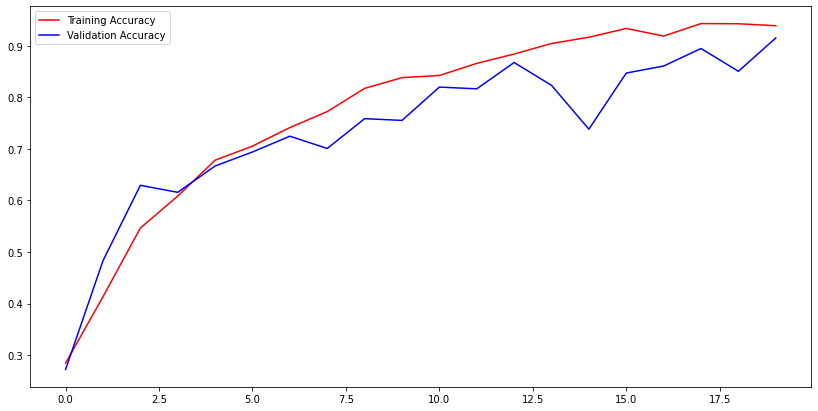

In [14]:
#

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

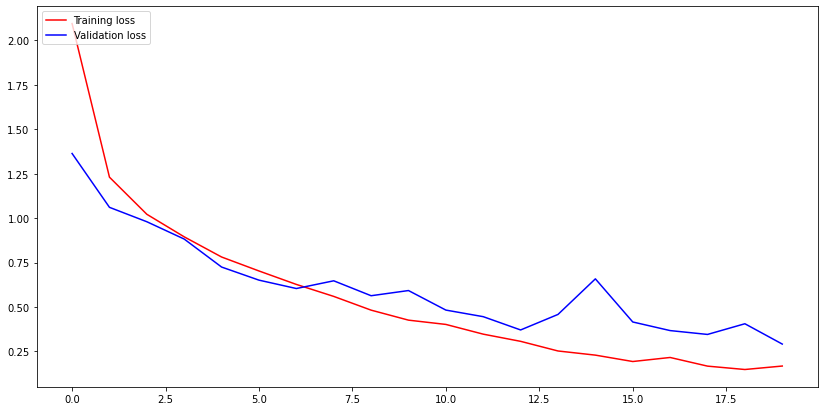

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [16]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [17]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [26]:
a=model.predict(img_array)
indices = a.argmax()
indices

3

In [30]:
labels[3]

'pituitary_tumor'

In [ ]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("/kaggle/working/braintumormodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/kaggle/working/braintumor.h5")